# Project Employee Sentiment Analysis

**Overview:** This project is designed to showcase Phuc Lam’s Python programming and AI modeling skills as part of his application to Springer Capital, Data Automation (LLM Route). The work involves analyzing an unlabeled dataset of employee messages using natural language processing (NLP) techniques, machine learning models, and statistical analysis. The project highlights key competencies including data preprocessing, sentiment labeling, exploratory data analysis, employee engagement scoring, risk identification, and predictive modeling. Deliverables include a fully documented Python codebase, visualizations, and a final report—demonstrating.

**Run this first**

In [51]:
import pandas as pd
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import numpy as np
import os


from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [41]:
# if not instal Vader run this
# !pip install vaderSentiment

## Load Data

In [3]:
file_path = "C:/Users/Phuc Lam/Desktop/Module 34 - Final LLM/test.xlsx"  #replace this with your path when run. NOTE: remmeber to change "\" to "/"
df = pd.read_excel(file_path)

## Task 1: Sentiment Labeling

In [5]:
df.head() #Cheak the original data

,Subject,body,date,from
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,2010-05-10,sally.beck@enron.com
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",2010-07-29,eric.bass@enron.com
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",2011-07-25,sally.beck@enron.com
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,2010-03-25,johnny.palmer@enron.com
4,Bet,Since you never gave me the $20 for the last t...,2011-05-21,lydia.delgado@enron.com


In [7]:
# 1) Data Preprocessing
def clean_text(t) -> str:
    """Clean text safely, handle NaN or non-string values."""
    if not isinstance(t, str):
        return ""
    t = re.sub(r'\s+', ' ', t)                  # collapse whitespace/newlines
    t = re.sub(r'^\s*re:\s*', '', t, flags=re.I)  # strip leading "Re:"
    return t.strip()
    
# Fill NaNs before combining
df["Subject"] = df["Subject"].fillna("").astype(str)
df["body"]    = df["body"].fillna("").astype(str)

# Combine Subject + body for context
df["text"] = (df["Subject"] + ". " + df["body"]).apply(clean_text)


In [11]:
df.head()   # check after combine

,Subject,body,date,from,text
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,2010-05-10,sally.beck@enron.com,EnronOptions Update!. EnronOptions Announcemen...
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",2010-07-29,eric.bass@enron.com,"(No Subject). Marc, Unfortunately, today is no..."
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",2011-07-25,sally.beck@enron.com,Phone Screen Interview - Shannon L. Burnham. W...
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,2010-03-25,johnny.palmer@enron.com,My new work email. we were thinking papasitos ...
4,Bet,Since you never gave me the $20 for the last t...,2011-05-21,lydia.delgado@enron.com,Bet. Since you never gave me the $20 for the l...


In [15]:
# 2) Score with VADER
analyzer = SentimentIntensityAnalyzer()

def score_text(text: str) -> float:
    """Return VADER compound score, safe for empty strings."""
    if not text or text.isspace():
        return 0.0
    return analyzer.polarity_scores(text)["compound"]

df["compound_score"] = df["text"].apply(score_text)

# 3) Map to labels

def to_label(compound: float) -> str:
    if compound > 0.05:
        return "Positive"
    elif compound < -0.05:
        return "Negative"
    else:
        return "Neutral"

df["sentiment"] = df["compound_score"].apply(to_label)


In [21]:
df.head()

,Subject,body,date,from,text,compound_score,sentiment
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,2010-05-10,sally.beck@enron.com,EnronOptions Update!. EnronOptions Announcemen...,0.8309,Positive
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",2010-07-29,eric.bass@enron.com,"(No Subject). Marc, Unfortunately, today is no...",0.4215,Positive
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",2011-07-25,sally.beck@enron.com,Phone Screen Interview - Shannon L. Burnham. W...,0.0000,Neutral
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,2010-03-25,johnny.palmer@enron.com,My new work email. we were thinking papasitos ...,0.0000,Neutral
4,Bet,Since you never gave me the $20 for the last t...,2011-05-21,lydia.delgado@enron.com,Bet. Since you never gave me the $20 for the l...,0.2500,Positive


In [19]:
# 4) Export results

cols = ["Subject", "body", "date", "from", "compound_score", "sentiment"]
df[cols].to_csv("C:/Users/Phuc Lam/Desktop/Module 34 - Final LLM/Task 1_result.csv", index=False)

print("✅ Done. Labeled file saved to /mnt/data/test_labeled.csv")
print(df["sentiment"].value_counts())

✅ Done. Labeled file saved to /mnt/data/test_labeled.csv
sentiment
Positive    1574
Neutral      444
Negative     173
Name: count, dtype: int64


## Task 2: : Exploratory Data Analysis (EDA)

In [9]:
# Load Task 1 result: 
file_path = "C:/Users/Phuc Lam/Desktop/Module 34 - Final LLM/Task 1_result.csv"  
task1 = pd.read_csv(file_path)

In [11]:
task1.head()

,Subject,body,date,from,compound_score,sentiment
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,2010-05-10,sally.beck@enron.com,0.8309,Positive
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",2010-07-29,eric.bass@enron.com,0.4215,Positive
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",2011-07-25,sally.beck@enron.com,0.0000,Neutral
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,2010-03-25,johnny.palmer@enron.com,0.0000,Neutral
4,Bet,Since you never gave me the $20 for the last t...,2011-05-21,lydia.delgado@enron.com,0.2500,Positive


In [13]:
df.head()

,Subject,body,date,from
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,2010-05-10,sally.beck@enron.com
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",2010-07-29,eric.bass@enron.com
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",2011-07-25,sally.beck@enron.com
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,2010-03-25,johnny.palmer@enron.com
4,Bet,Since you never gave me the $20 for the last t...,2011-05-21,lydia.delgado@enron.com


Data shape: (2191, 5)
Data types:
 Subject            object
body               object
date       datetime64[ns]
from               object
text               object
dtype: object
Missing values:
 Subject    0
body       0
date       0
from       0
text       0
dtype: int64

Label distribution:
            count    pct
sentiment              
Positive    1574  71.84
Neutral      444  20.26
Negative     173   7.90


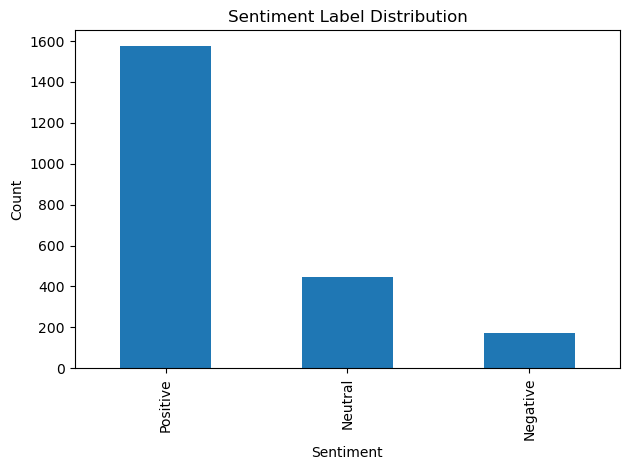

In [25]:
# 0) check data structure 

print("Data shape:", df.shape)
print("Data types:\n", df.dtypes)
print("Missing values:\n", df.isna().sum())

# 1) Data Preprocessing Fill NaNs

label_counts = task1["sentiment"].value_counts().to_frame("count")
label_counts["pct"] = (label_counts["count"] / len(task1) * 100).round(2)
print("\nLabel distribution:\n", label_counts)

# 2) Plot label distribution 
plt.figure()
label_counts["count"].plot(kind="bar")
plt.title("Sentiment Label Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.tight_layout()


Monthly counts by sentiment:
 sentiment   Negative  Neutral  Positive
month                                  
2010-01-01         5       23        63
2010-02-01        11       23        57
2010-03-01        11       21        59
2010-04-01         7       20        65
2010-05-01         7       22        62

Monthly mean compound sentiment:
             mean_compound
month                    
2010-01-01       0.400040
2010-02-01       0.369298
2010-03-01       0.370493
2010-04-01       0.412323
2010-05-01       0.436787


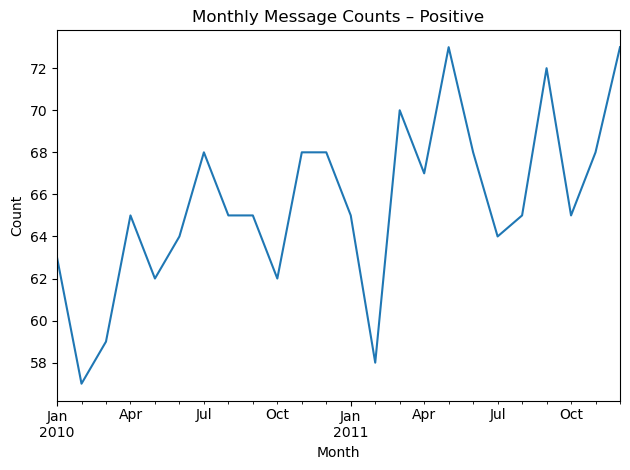

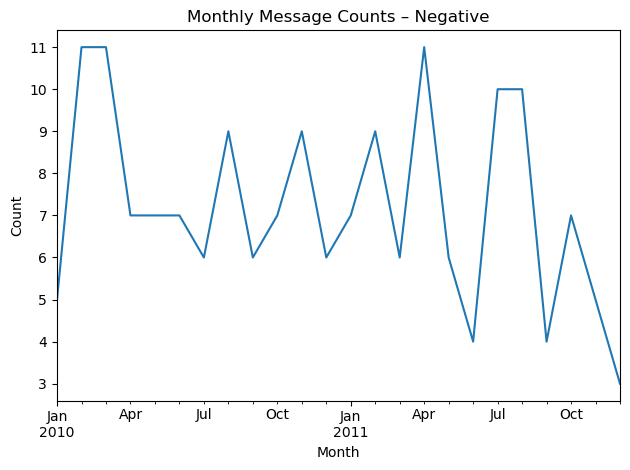

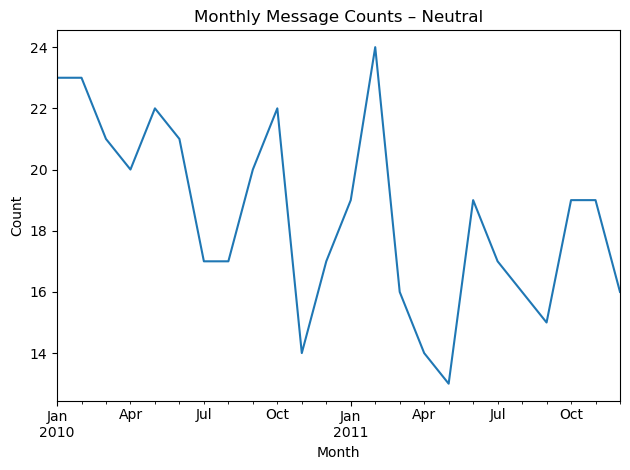

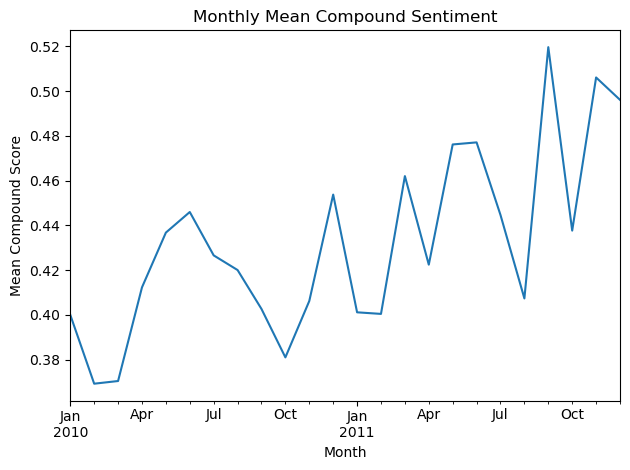

In [29]:
# 3) Trends Analysis over time
      
      # 3.1) Ensure datetime

task1["date"] = pd.to_datetime(task1["date"], errors="coerce")
task1["month"] = task1["date"].dt.to_period("M").dt.to_timestamp()  

     # 3.2) Monthly counts by label

monthly_label_counts = (
    task1.groupby(["month", "sentiment"])
         .size()
         .unstack(fill_value=0)
         .sort_index()
)
print("\nMonthly counts by sentiment:\n", monthly_label_counts.head()) 

     # 3.3) Plot Each Label

for label in ["Positive", "Negative", "Neutral"]:
    if label in monthly_label_counts.columns:
        plt.figure()
        monthly_label_counts[label].plot()
        plt.title(f"Monthly Message Counts – {label}")
        plt.xlabel("Month")
        plt.ylabel("Count")
        plt.tight_layout()
        
     # 3.4) Monthly Average Sentiment Score

monthly_mean = (
    task1.groupby("month")["compound_score"]
         .mean()
         .to_frame("mean_compound")
)
print("\nMonthly mean compound sentiment:\n", monthly_mean.head())

plt.figure()
monthly_mean["mean_compound"].plot()
plt.title("Monthly Mean Compound Sentiment")
plt.xlabel("Month")
plt.ylabel("Mean Compound Score")
plt.tight_layout()




In [31]:
# 4) Deep Analysis
     # 4.1 Top senders overall
top_senders = task1["from"].value_counts().head(10)
print("\nTop senders:\n", top_senders)

     # 4.2 Top negative senders
top_negative = (
    task1[task1["sentiment"]=="Negative"]["from"]
    .value_counts()
    .head(10)
)
print("\nTop negative senders:\n", top_negative)



Top senders:
 from
lydia.delgado@enron.com        284
john.arnold@enron.com          256
sally.beck@enron.com           227
patti.thompson@enron.com       225
bobette.riner@ipgdirect.com    217
johnny.palmer@enron.com        213
don.baughman@enron.com         213
eric.bass@enron.com            210
kayne.coulter@enron.com        174
rhonda.denton@enron.com        172
Name: count, dtype: int64

Top negative senders:
 from
sally.beck@enron.com           25
bobette.riner@ipgdirect.com    23
johnny.palmer@enron.com        21
patti.thompson@enron.com       20
kayne.coulter@enron.com        18
lydia.delgado@enron.com        16
eric.bass@enron.com            15
don.baughman@enron.com         13
john.arnold@enron.com          12
rhonda.denton@enron.com        10
Name: count, dtype: int64


In [35]:
# 5) Save summaries

label_counts.to_csv("C:/Users/Phuc Lam/Desktop/Module 34 - Final LLM/Task 2_eda_label_counts.csv")
monthly_label_counts.to_csv("C:/Users/Phuc Lam/Desktop/Module 34 - Final LLM/Task 2_eda_monthly_label_counts.csv")
monthly_mean.to_csv("C:/Users/Phuc Lam/Desktop/Module 34 - Final LLM/Task 2_eda_monthly_compound_mean.csv")

print("✅ EDA complete. Outputs saved to /mnt/data/")

output_path = "C:/Users/Phuc Lam/Desktop/Module 34 - Final LLM/Task 2_EDA_summary.csv"

with open(output_path, "w", encoding="utf-8") as f:
    # Label counts
    f.write("=== Sentiment Label Counts ===\n")
    label_counts.to_csv(f)
    f.write("\n\n")

    # Monthly label counts
    f.write("=== Monthly Label Counts ===\n")
    monthly_label_counts.to_csv(f)
    f.write("\n\n")

    # Monthly mean sentiment
    f.write("=== Monthly Mean Compound Sentiment ===\n")
    monthly_mean.to_csv(f)
    f.write("\n")

print(f"✅ EDA complete. Combined summary saved to: {output_path}")

✅ EDA complete. Outputs saved to /mnt/data/
✅ EDA complete. Combined summary saved to: C:/Users/Phuc Lam/Desktop/Module 34 - Final LLM/Task 2_EDA_summary.csv


## Task 3: Employee Score Calculation

In [43]:
# Load Task 1 result: 
file_path = "C:/Users/Phuc Lam/Desktop/Module 34 - Final LLM/Task 1_result.csv"  
task1 = pd.read_csv(file_path)

In [45]:
task1.head()

,Subject,body,date,from,compound_score,sentiment
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,2010-05-10,sally.beck@enron.com,0.8309,Positive
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",2010-07-29,eric.bass@enron.com,0.4215,Positive
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",2011-07-25,sally.beck@enron.com,0.0000,Neutral
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,2010-03-25,johnny.palmer@enron.com,0.0000,Neutral
4,Bet,Since you never gave me the $20 for the last t...,2011-05-21,lydia.delgado@enron.com,0.2500,Positive


In [47]:
# 1) Clean & prep

task1 = task1.copy()
task1["from"] = task1["from"].fillna("(unknown)").astype(str)
task1["sentiment"] = task1["sentiment"].fillna("Neutral").astype(str)

task1["date"] = pd.to_datetime(task1["date"], errors="coerce")   # Ensure datetime
valid = task1.dropna(subset=["date"]).copy()   #  Drop rows with invalid dates for time-based grouping

valid["month"] = valid["date"].dt.to_period("M").dt.to_timestamp()   # Monthly bucket (start of month timestamp)

In [49]:
# 2) Per_message score mapping

score_map = {"Positive": 1, "Negative": -1, "Neutral": 0}
valid["msg_score"] = valid["sentiment"].map(score_map).fillna(0).astype(int)

# 3) Aggregate monthly score per employee

employee_monthly = (
    valid.groupby(["from", "month"], as_index=False)["msg_score"]
         .sum()
         .rename(columns={"msg_score": "monthly_score"})
         .sort_values(["from", "month"])
)

employee_monthly.to_csv("C:/Users/Phuc Lam/Desktop/Module 34 - Final LLM/Task3_employee_monthly_scores.csv", index=False)

In [51]:
# 4) Sanity Check 
employee_monthly.head(10)

,from,month,monthly_score
0,bobette.riner@ipgdirect.com,2010-01-01,1
1,bobette.riner@ipgdirect.com,2010-02-01,8
2,bobette.riner@ipgdirect.com,2010-03-01,4
3,bobette.riner@ipgdirect.com,2010-04-01,4
4,bobette.riner@ipgdirect.com,2010-05-01,3
5,bobette.riner@ipgdirect.com,2010-06-01,2
6,bobette.riner@ipgdirect.com,2010-07-01,8
7,bobette.riner@ipgdirect.com,2010-08-01,4
8,bobette.riner@ipgdirect.com,2010-09-01,8
9,bobette.riner@ipgdirect.com,2010-10-01,6


## Task 4: Employee Ranking

In [21]:
# Load Task 3 result: 
file_path = "C:/Users/Phuc Lam/Desktop/Module 34 - Final LLM/Task3_employee_monthly_scores.csv"  
task3 = pd.read_csv(file_path)

In [23]:
dfm = task3.copy()

# 1) Rankings

     # 1.1) Top 3 Positive: highest score first (desc), then name A–Z

top3_pos = (
    dfm.sort_values(["month", "monthly_score", "from"], ascending=[True, False, True])
       .groupby("month", group_keys=False)
       .head(3)
       .assign(rank=lambda d: d.groupby("month").cumcount() + 1)
       [["month", "from", "monthly_score", "rank"]]
)

     # 1.2) Top 3 Negative: lowest score first (desc), then name A–Z

top3_neg = (
    dfm.sort_values(["month", "monthly_score", "from"], ascending=[True, True, True])
       .groupby("month", group_keys=False)
       .head(3)
       .assign(rank=lambda d: d.groupby("month").cumcount() + 1)
       [["month", "from", "monthly_score", "rank"]]
)

# 2) Save results

top3_pos.to_csv("C:/Users/Phuc Lam/Desktop/Module 34 - Final LLM/Task4_top3_positive_by_month.csv")
top3_neg.to_csv("C:/Users/Phuc Lam/Desktop/Module 34 - Final LLM/Task4_top3_negative_by_month.csv")



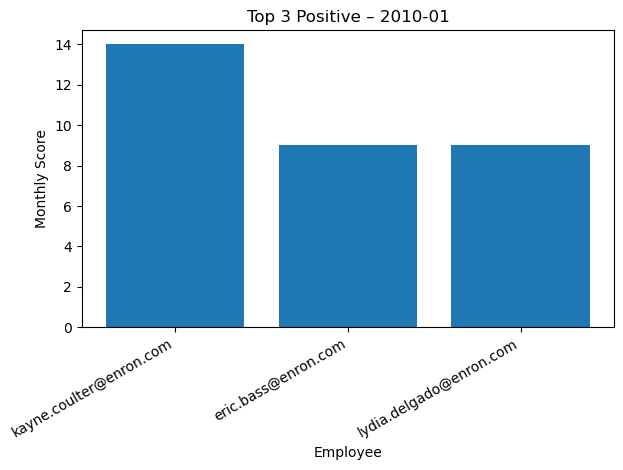

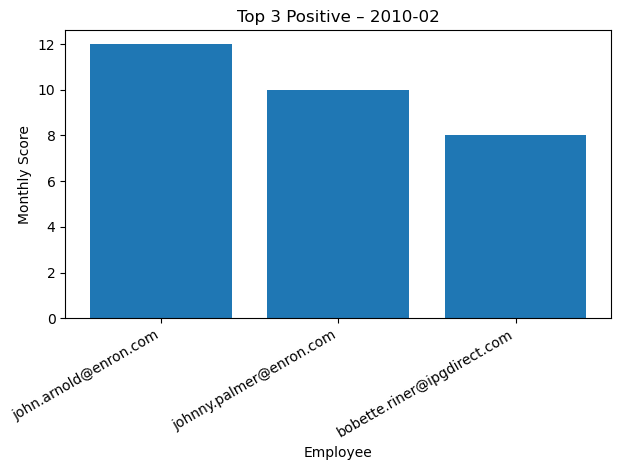

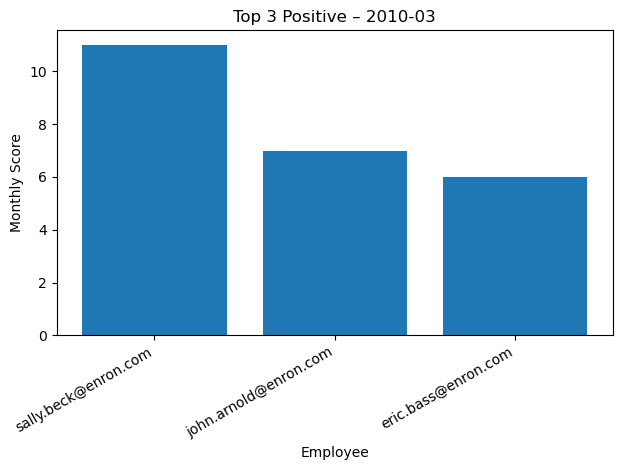

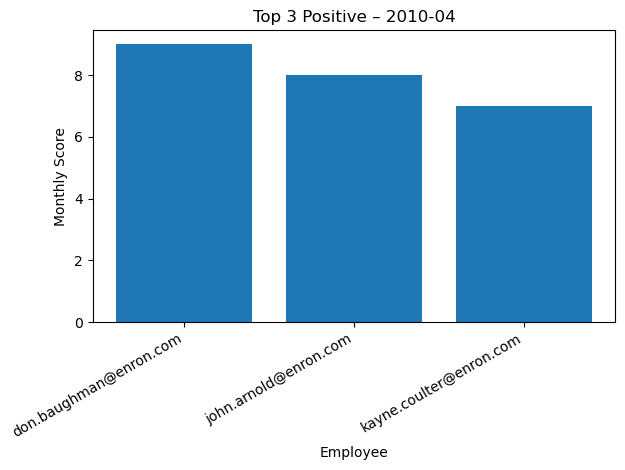

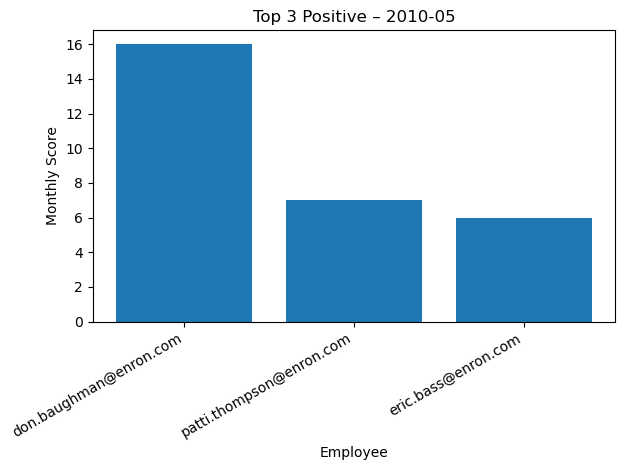

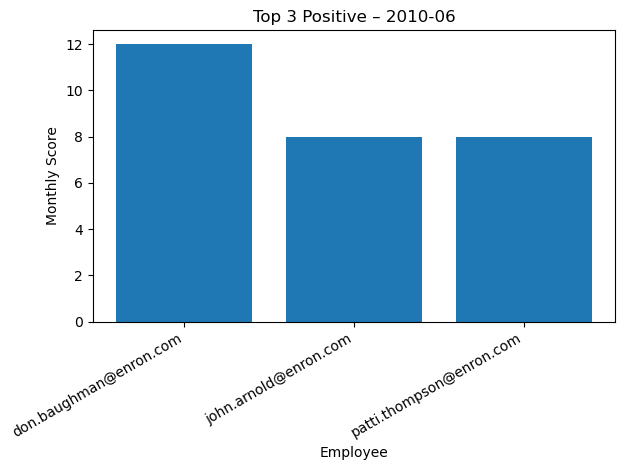

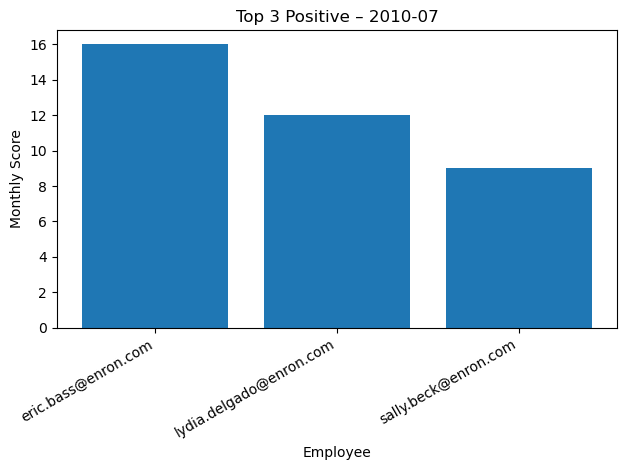

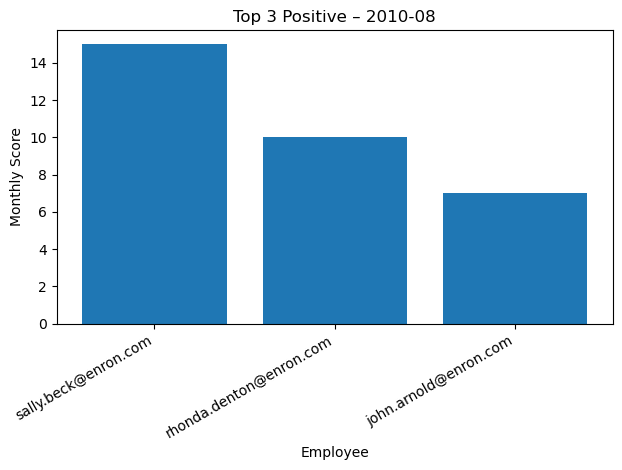

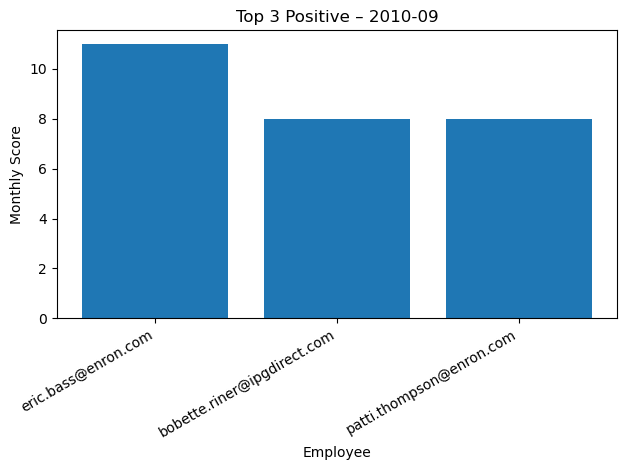

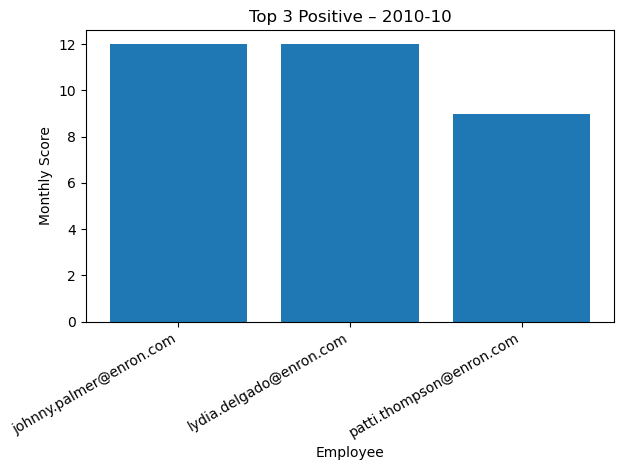

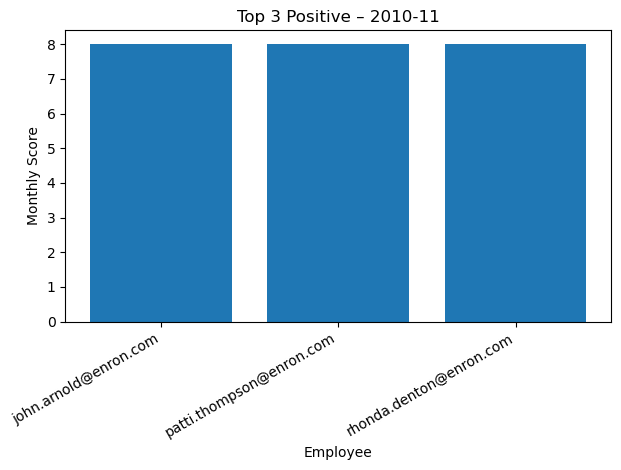

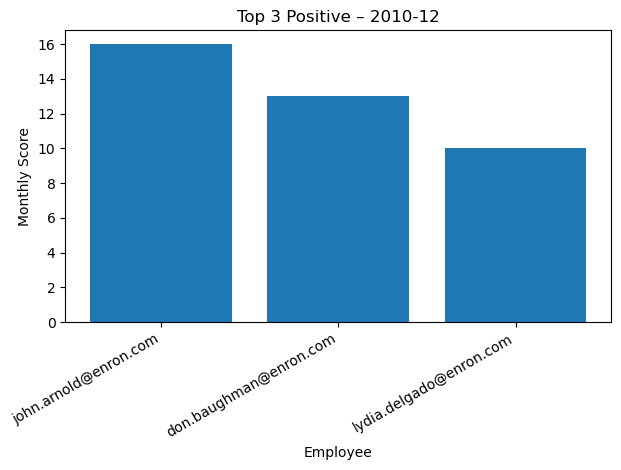

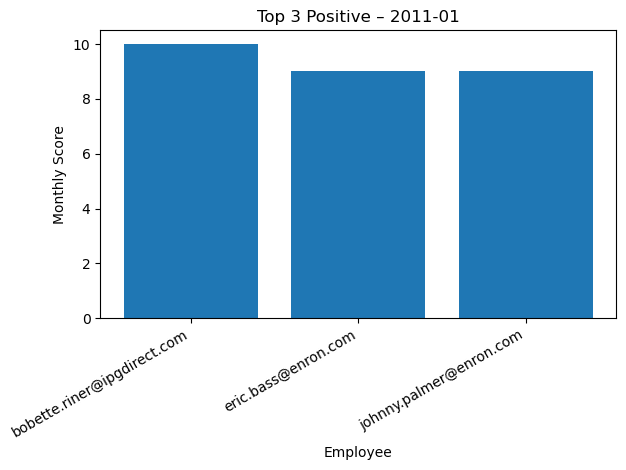

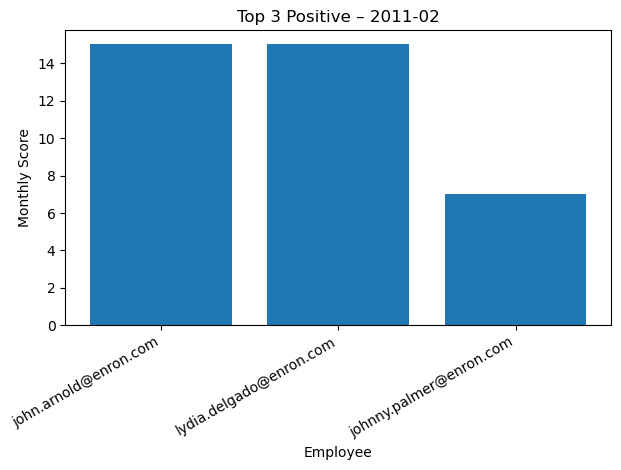

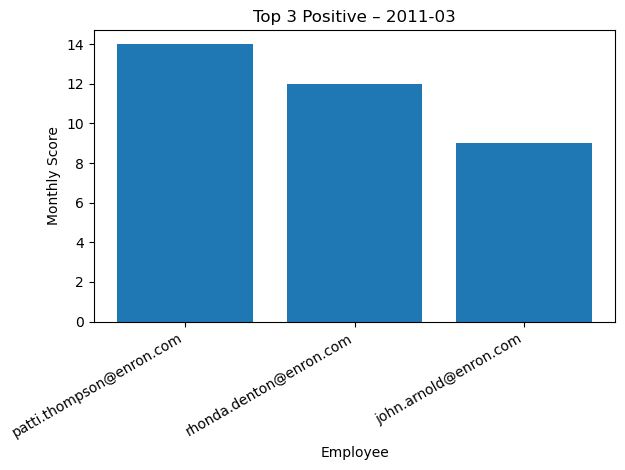

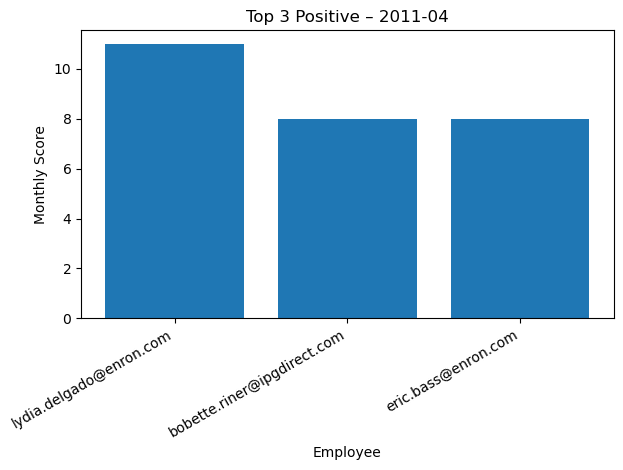

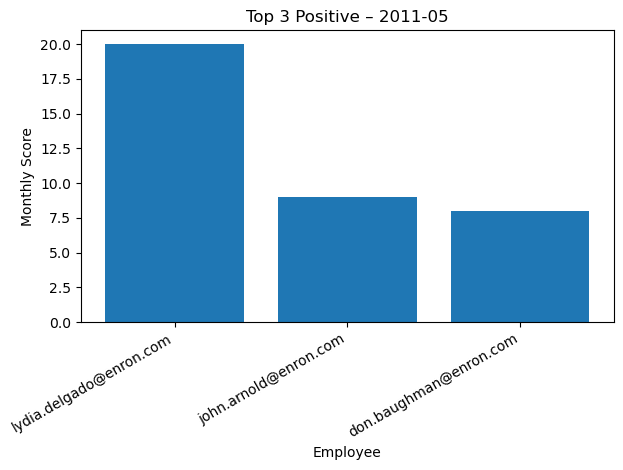

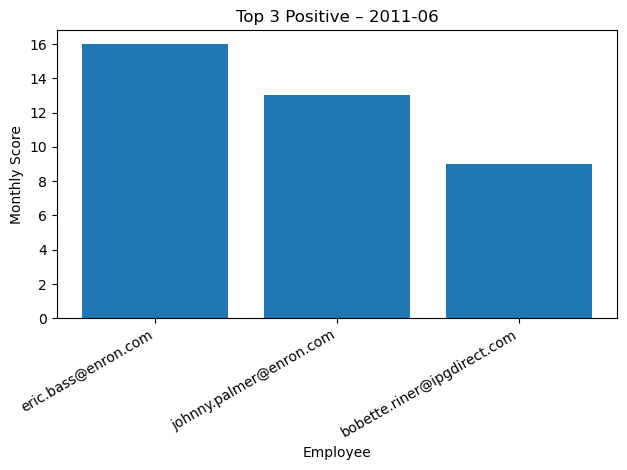

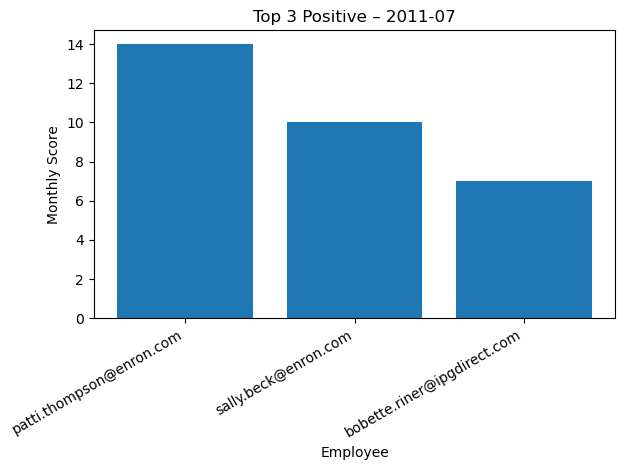

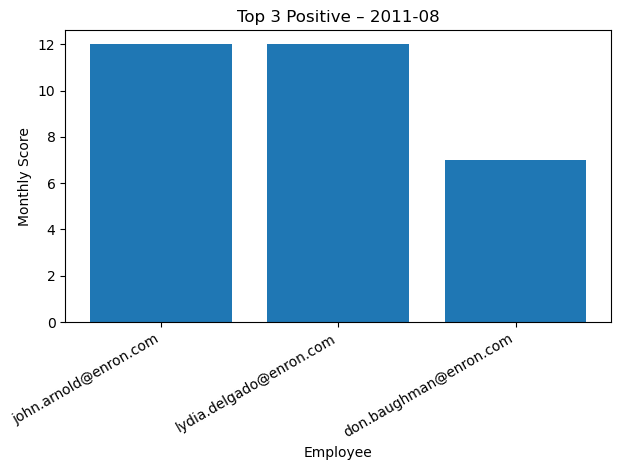

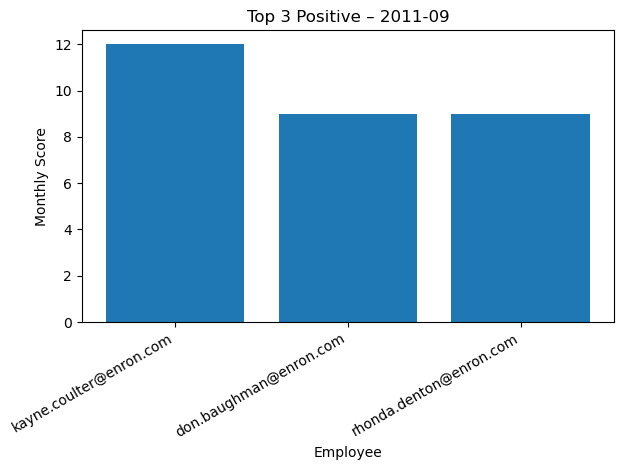

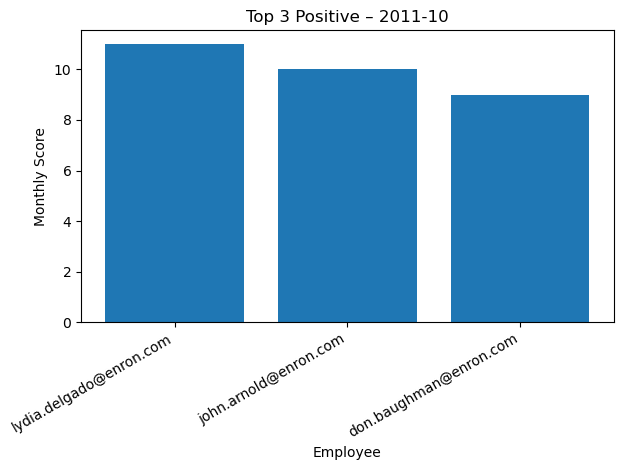

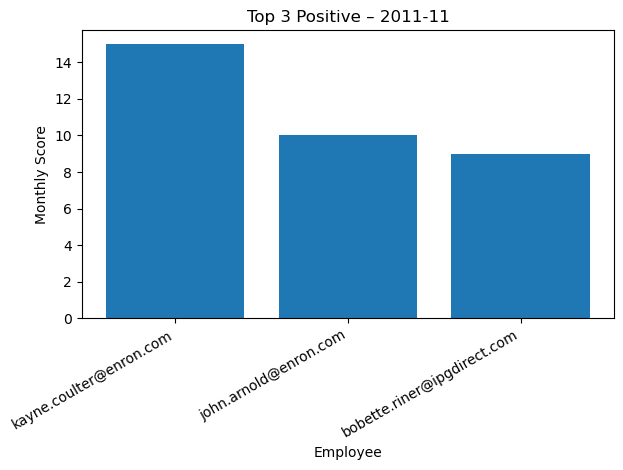

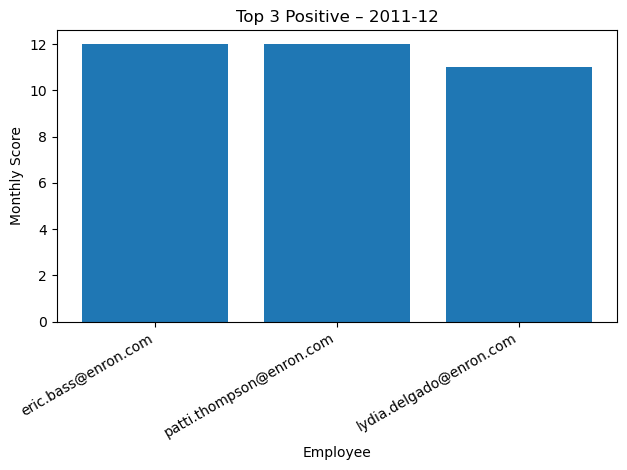

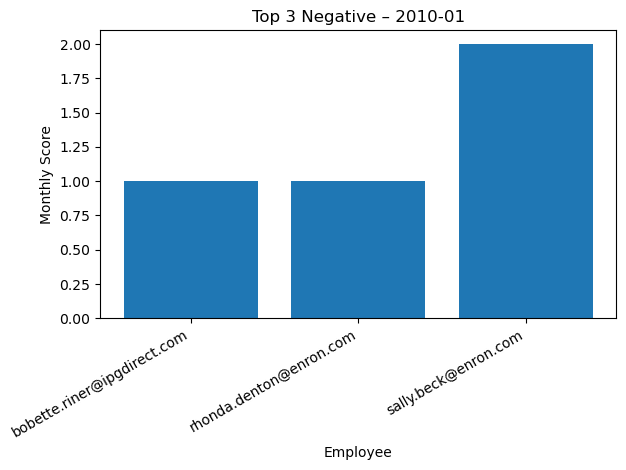

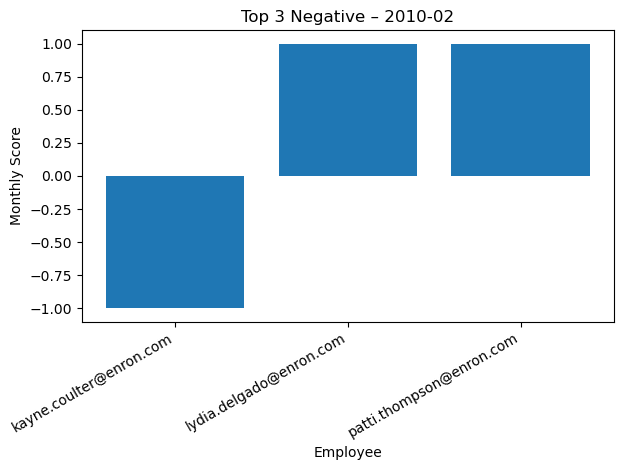

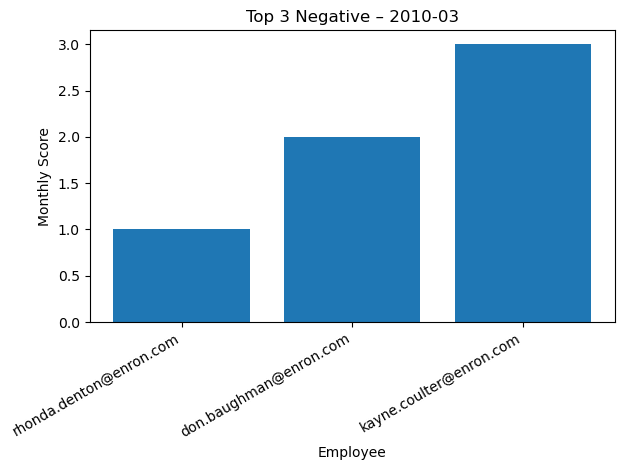

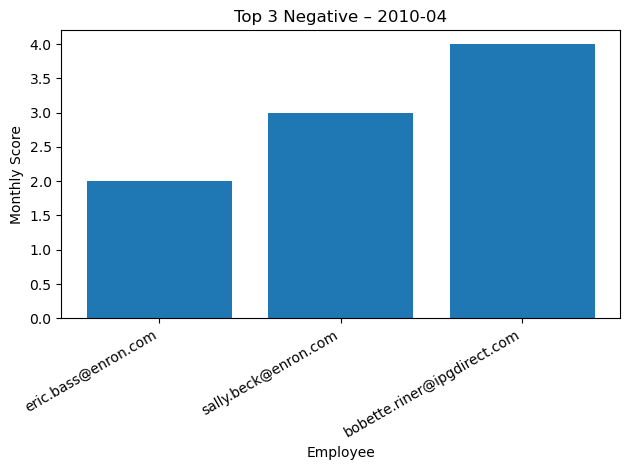

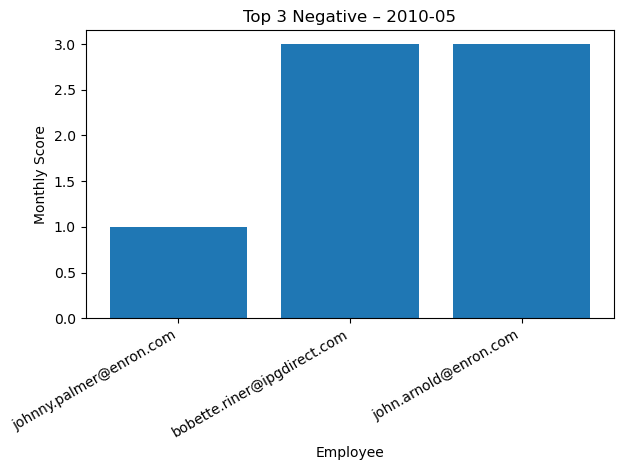

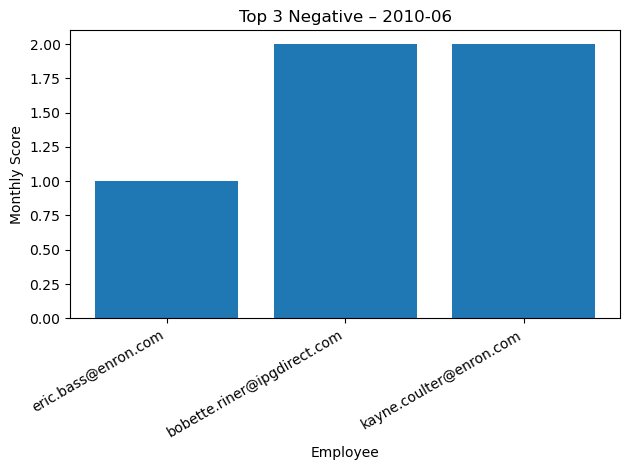

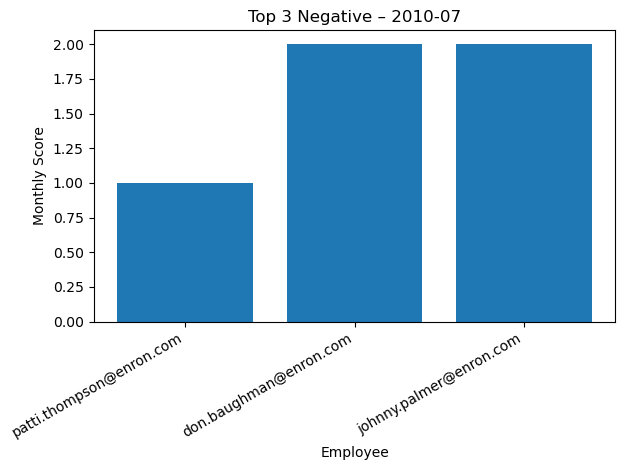

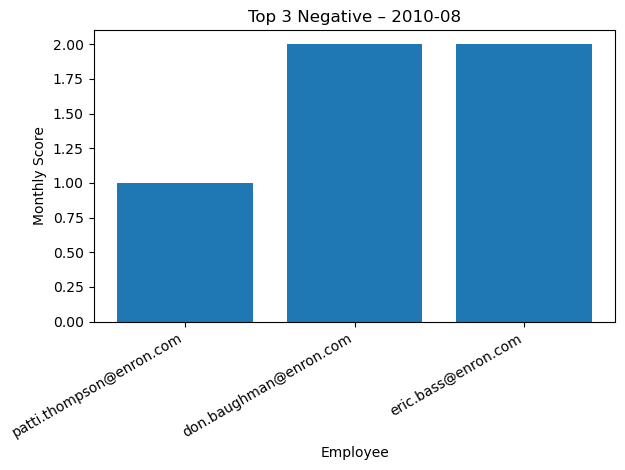

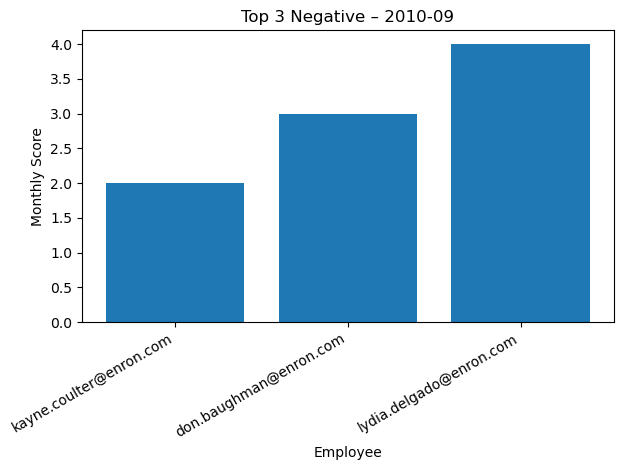

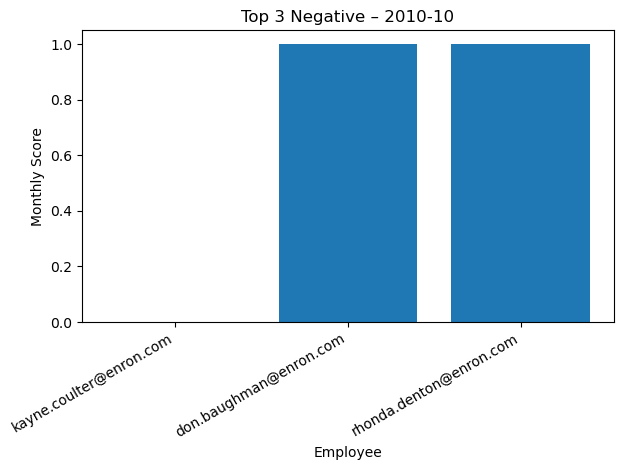

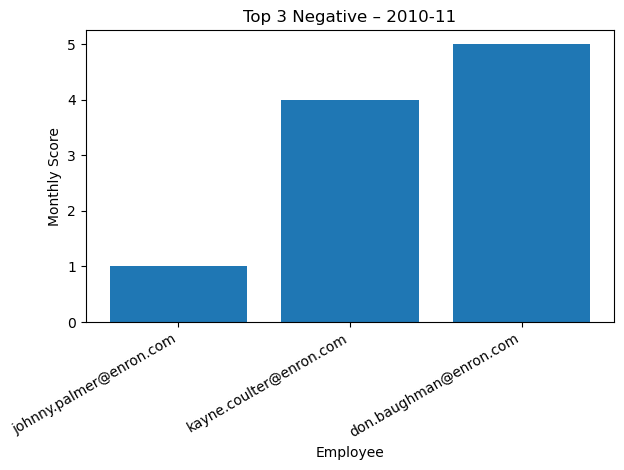

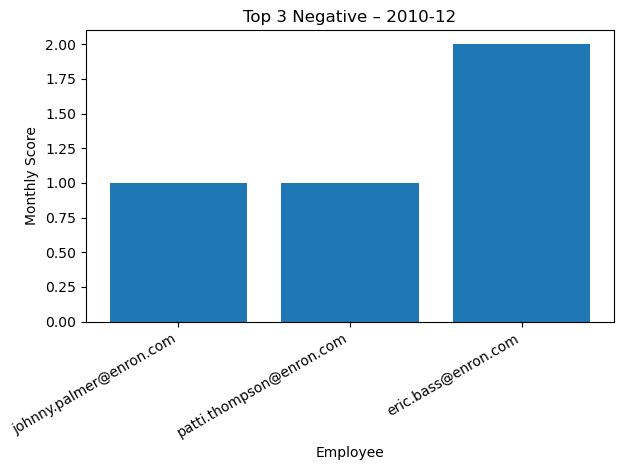

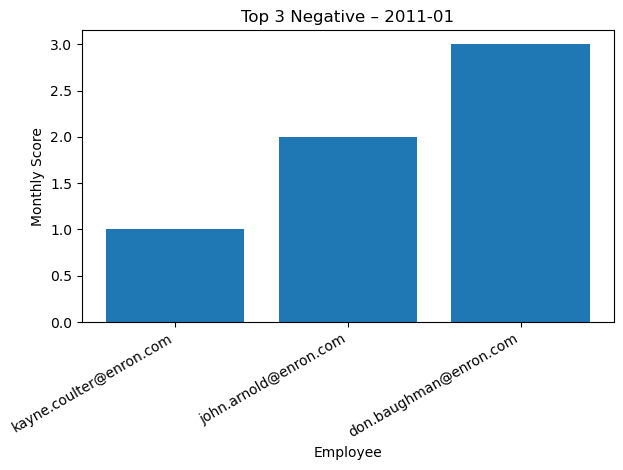

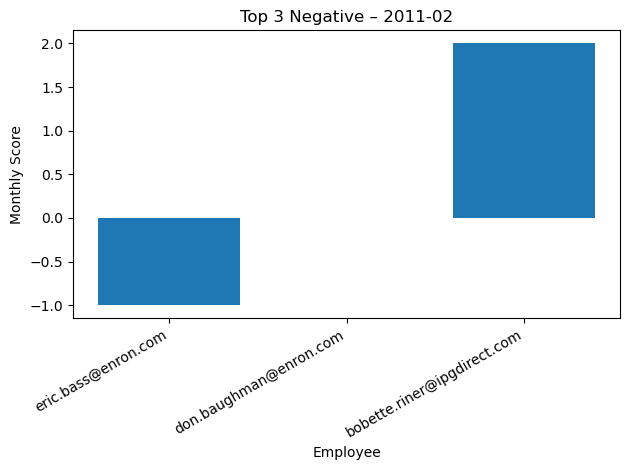

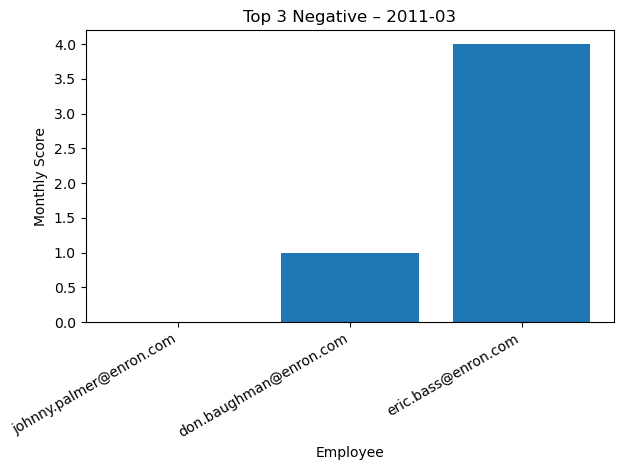

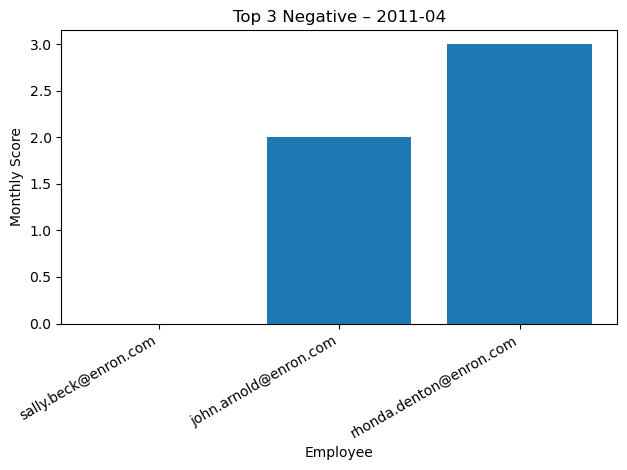

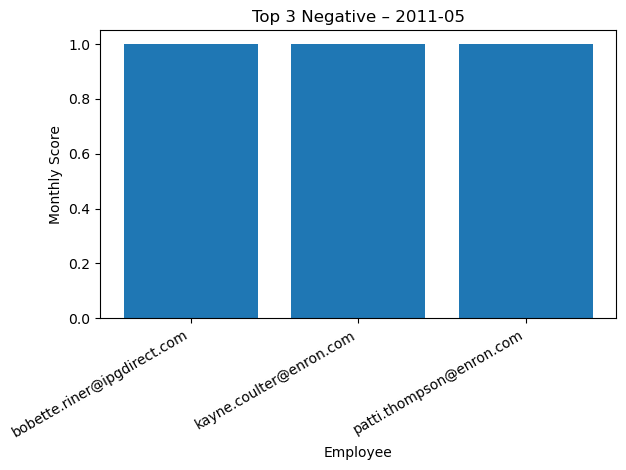

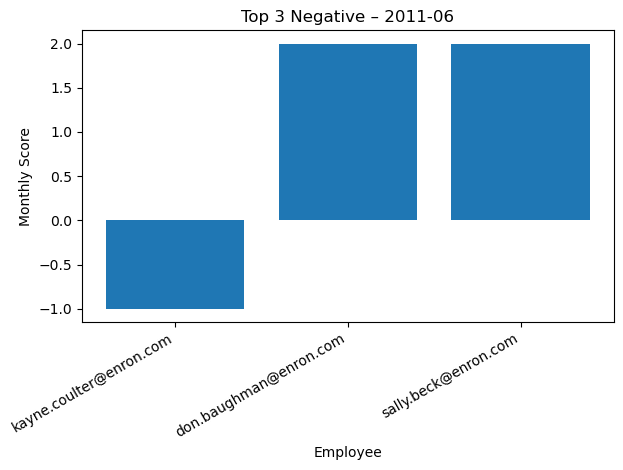

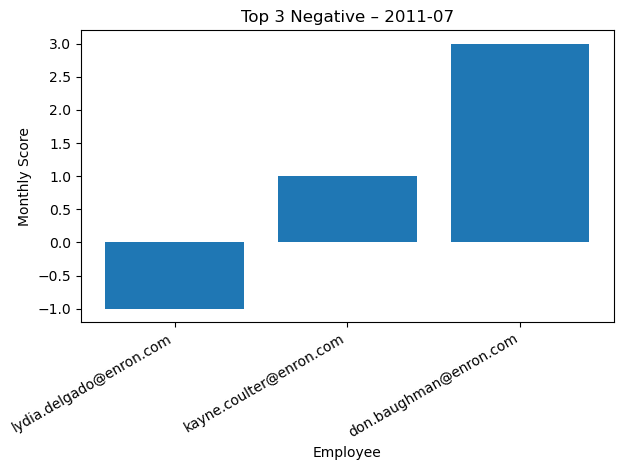

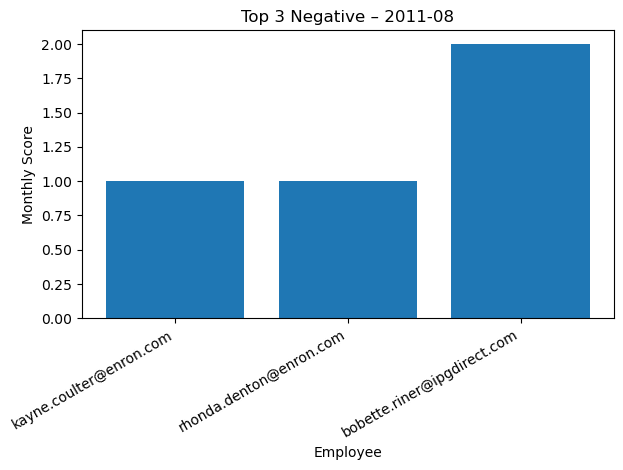

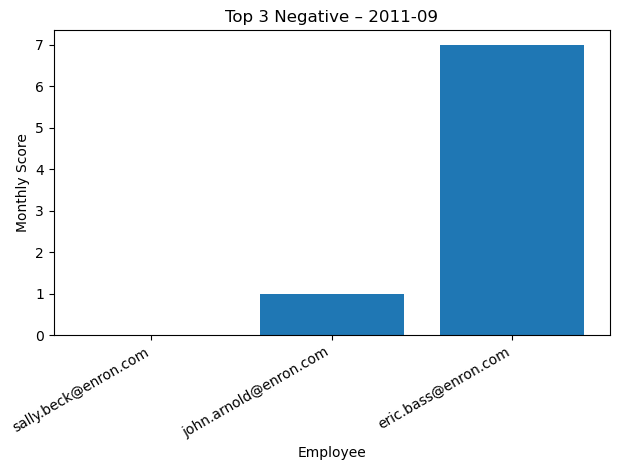

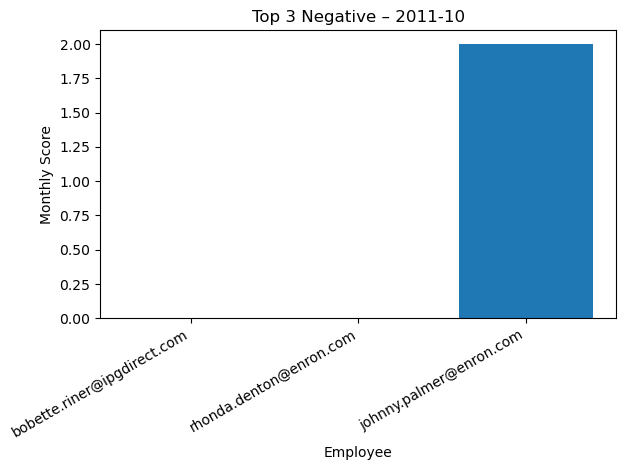

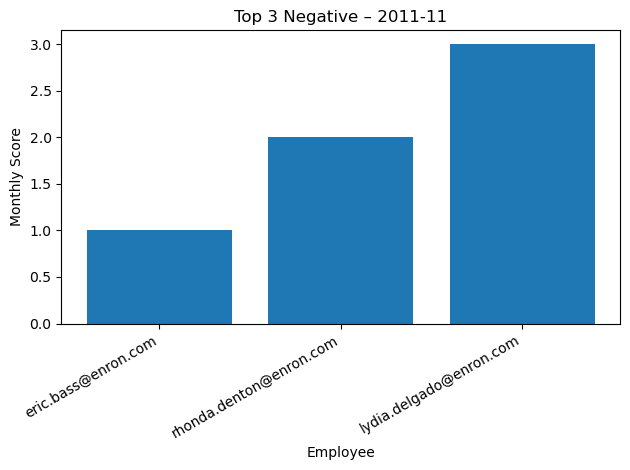

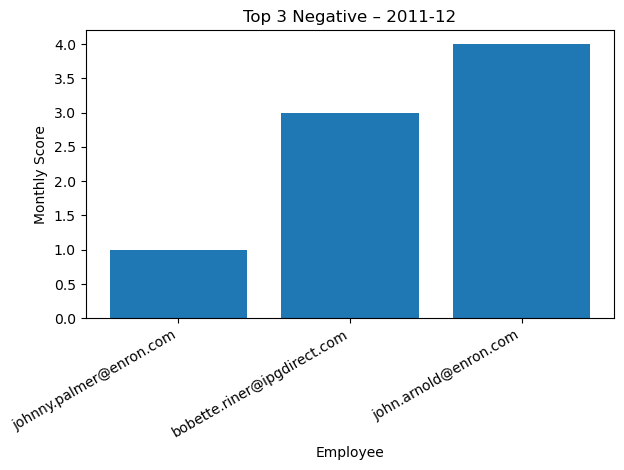

In [31]:
def _month_str(m):
    if isinstance(m, pd.Timestamp):
        return m.strftime("%Y-%m")
    try:
        return pd.to_datetime(m).strftime("%Y-%m")
    except Exception:
        return str(m)

def plot_top3_by_month(df, title_prefix):
    df = df.copy()
    # ensure month is datetime
    df["month"] = pd.to_datetime(df["month"], errors="coerce")
    df = df.dropna(subset=["month"])
    # iterate months in order
    for m, g in df.sort_values(["month","rank","from"]).groupby("month"):
        g = g.sort_values(["rank","from"])
        labels = g["from"].astype(str).tolist()
        scores = g["monthly_score"].tolist()

        plt.figure()
        plt.bar(labels, scores)
        plt.title(f"{title_prefix} – {_month_str(m)}")
        plt.xlabel("Employee")
        plt.ylabel("Monthly Score")
        plt.xticks(rotation=30, ha="right")
        plt.tight_layout()
        plt.show()

# Show charts in Jupyter (one figure per month)
plot_top3_by_month(top3_pos, "Top 3 Positive")
plot_top3_by_month(top3_neg, "Top 3 Negative")

Top 3 Positive — All Time
 rank                     from  total_score
    1  lydia.delgado@enron.com          188
    2    john.arnold@enron.com          179
    3 patti.thompson@enron.com          147

Top 3 Negative — All Time
 rank                        from  total_score
    1     kayne.coulter@enron.com          105
    2     rhonda.denton@enron.com          112
    3 bobette.riner@ipgdirect.com          126


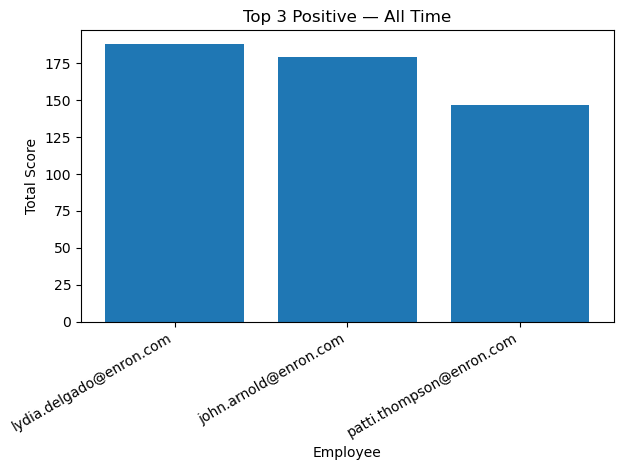

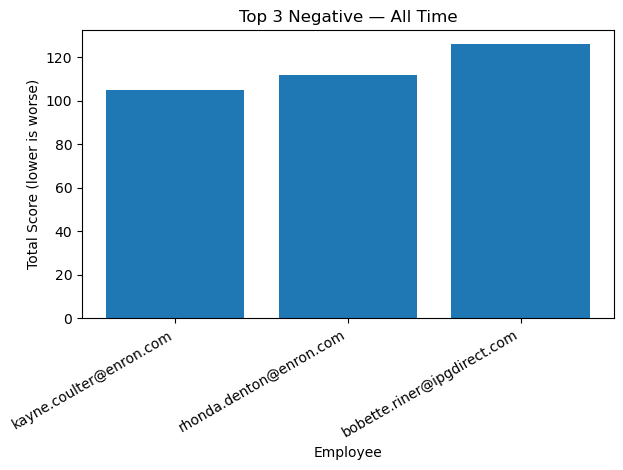

In [35]:
all_time = (
    dfm.groupby("from", as_index=False)["monthly_score"]
       .sum()
       .rename(columns={"monthly_score": "total_score"})
)

top3_pos_all = (
    all_time.sort_values(["total_score", "from"], ascending=[False, True])
            .head(3)
            .assign(rank=lambda d: range(1, len(d) + 1))
)[["rank", "from", "total_score"]]

top3_neg_all = (
    all_time.sort_values(["total_score", "from"], ascending=[True, True])
            .head(3)
            .assign(rank=lambda d: range(1, len(d) + 1))
)[["rank", "from", "total_score"]]

print("Top 3 Positive — All Time")
print(top3_pos_all.to_string(index=False))
print("\nTop 3 Negative — All Time")
print(top3_neg_all.to_string(index=False))

# Positive
plt.figure()
plt.bar(top3_pos_all["from"], top3_pos_all["total_score"])
plt.title("Top 3 Positive — All Time")
plt.xlabel("Employee")
plt.ylabel("Total Score")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

# Negative
plt.figure()
plt.bar(top3_neg_all["from"], top3_neg_all["total_score"])
plt.title("Top 3 Negative — All Time")
plt.xlabel("Employee")
plt.ylabel("Total Score (lower is worse)")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

## Task 5: Flight Risk Identification

In [40]:
#Load Data
file_path = "C:/Users/Phuc Lam/Desktop/Module 34 - Final LLM/Task 1_result.csv"  
task1 = pd.read_csv(file_path)

In [46]:
# 1) Prep & filter negatives
fr = task1.copy()
fr["from"] = fr["from"].fillna("(unknown)").astype(str)
fr["date"] = pd.to_datetime(fr["date"], errors="coerce")
fr = fr.dropna(subset=["date"])

neg = fr[fr["sentiment"].str.lower() == "negative"].copy()
neg = neg.sort_values(["from", "date"]).reset_index(drop=True)
neg["ones"] = 1  # count each negative message as 1

# 2) Rolling 30-day count per employee (robust across pandas versions)
roll_sum = (
    neg.set_index("date")
       .groupby("from")["ones"]
       .rolling("30D")
       .sum()
       .reset_index(level=0, drop=True)
)
neg["neg_30d_count"] = roll_sum.astype(int).to_numpy()

# 3) Flag events meeting threshold
flag_events = neg[neg["neg_30d_count"] >= 4].copy()
flag_events["window_start"] = flag_events["date"] - pd.Timedelta(days=30)
flag_events["window_end"] = flag_events["date"]

# 4) Unique employees at risk + metadata
flight_risk_employees = (
    flag_events.groupby("from")
               .agg(
                   earliest_trigger=("date", "min"),
                   latest_trigger=("date", "max"),
                   max_30d_count=("neg_30d_count", "max"),
                   total_negative_msgs=("date", "size"),
               )
               .reset_index()
               .sort_values(["max_30d_count", "from"], ascending=[False, True])
)

print("=== Flight Risk Employees (unique) ===")
print(flight_risk_employees.to_string(index=False))

print("\n=== Sample Flight Risk Events ===")
print(flag_events[["from","date","window_start","window_end","neg_30d_count"]]
      .head(20)
      .to_string(index=False))


=== Flight Risk Employees (unique) ===
                       from earliest_trigger latest_trigger  max_30d_count  total_negative_msgs
       sally.beck@enron.com       2011-08-22     2011-08-25              5                    2
bobette.riner@ipgdirect.com       2011-04-17     2011-04-17              4                    1
        eric.bass@enron.com       2011-05-17     2011-05-30              4                    2
      john.arnold@enron.com       2010-06-21     2010-06-21              4                    1
    johnny.palmer@enron.com       2010-03-10     2010-03-16              4                    2
    kayne.coulter@enron.com       2010-04-25     2010-04-25              4                    1
   patti.thompson@enron.com       2011-07-30     2011-07-30              4                    1

=== Sample Flight Risk Events ===
                       from       date window_start window_end  neg_30d_count
bobette.riner@ipgdirect.com 2011-04-17   2011-03-18 2011-04-17              4
  

In [48]:
# Optional: keep these DataFrames for later tasks/report
flight_risk_employees.to_csv("C:/Users/Phuc Lam/Desktop/Module 34 - Final LLM/Task5_flight_risk_employees.csv", index=False)
flag_events.to_csv("C:/Users/Phuc Lam/Desktop/Module 34 - Final LLM/Task5_flight_risk_events.csv", index=False)

## Task 6: Predictive Modeling

In [ ]:
#Load Data
file_path = "C:/Users/Phuc Lam/Desktop/Module 34 - Final LLM/Task 1_result.csv"  
task1 = pd.read_csv(file_path)

In [55]:
# 1). Prep base data

df = task1.copy()

# Clean/ensure types
df["from"] = df["from"].fillna("(unknown)").astype(str)
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df = df.dropna(subset=["date"])

# Basic text features at message level
df["body"] = df["body"].fillna("").astype(str)
df["word_count"] = df["body"].str.split().apply(len)
df["char_len"]   = df["body"].str.len()

# Month bucket for aggregation
df["month"] = df["date"].dt.to_period("M").dt.to_timestamp()

# 2). Aggregate to employee-month level

# Per-employee-month aggregates
agg = (
    df.groupby(["from", "month"], as_index=False)
      .agg(
          mean_compound=("compound_score", "mean"),   # TARGET y
          message_count=("compound_score", "size"),
          pos_count=("sentiment", lambda s: (s == "Positive").sum()),
          neg_count=("sentiment", lambda s: (s == "Negative").sum()),
          neu_count=("sentiment", lambda s: (s == "Neutral").sum()),
          avg_word_count=("word_count", "mean"),
          avg_char_len=("char_len", "mean"),
          std_compound=("compound_score", "std"),
      )
)

# Handle NaNs in std (happens if only one message in the month)
agg["std_compound"] = agg["std_compound"].fillna(0.0)

# Ratios
total = agg["message_count"].replace(0, np.nan)
agg["pos_ratio"] = (agg["pos_count"] / total).fillna(0.0)
agg["neg_ratio"] = (agg["neg_count"] / total).fillna(0.0)
agg["neu_ratio"] = (agg["neu_count"] / total).fillna(0.0)

In [57]:
# 3).  Add a lag feature (previous month's mean compound per employee)

agg = agg.sort_values(["from", "month"]).reset_index(drop=True)
agg["lag1_mean_compound"] = (
    agg.groupby("from")["mean_compound"].shift(1)
)
# For first month per employee, backfill with overall mean to avoid NaNs
global_mean = agg["mean_compound"].mean()
agg["lag1_mean_compound"] = agg["lag1_mean_compound"].fillna(global_mean)

# 4). Define features X and target y

feature_cols = [
    "message_count",
    "pos_ratio", "neg_ratio", "neu_ratio",
    "avg_word_count", "avg_char_len",
    "std_compound",
    "lag1_mean_compound",
]
target_col = "mean_compound"

X = agg[feature_cols].copy()
y = agg[target_col].copy()

# 5). Time-based train/test split 

months_sorted = np.array(sorted(agg["month"].unique()))
# Use the last ~25% months (but at least 2 months) as test
test_k = max(2, int(np.ceil(0.25 * len(months_sorted))))
test_months = set(months_sorted[-test_k:])
train_months = set(months_sorted[:-test_k]) if len(months_sorted) > test_k else set()

train_idx = agg["month"].isin(train_months)
test_idx  = agg["month"].isin(test_months)

X_train, y_train = X[train_idx], y[train_idx]
X_test,  y_test  = X[test_idx],  y[test_idx]

print("Train months:", sorted(pd.to_datetime(list(train_months))))
print("Test months :", sorted(pd.to_datetime(list(test_months))))
print("Train size :", len(X_train), "rows")
print("Test size  :", len(X_test),  "rows")

# Guard against too-small splits
if len(X_train) < 5 or len(X_test) < 2:
    print("⚠️ Warning: very small train/test split. Consider adjusting `test_k` or aggregating more months.")

# 6). Build & fit model (Linear Regression with standardized features)
numeric_features = feature_cols
pre = ColumnTransformer(
    transformers=[("num", StandardScaler(), numeric_features)],
    remainder="drop"
)

model = Pipeline(steps=[
    ("preprocess", pre),
    ("linreg", LinearRegression())
])

model.fit(X_train, y_train)


Train months: [Timestamp('2010-01-01 00:00:00'), Timestamp('2010-02-01 00:00:00'), Timestamp('2010-03-01 00:00:00'), Timestamp('2010-04-01 00:00:00'), Timestamp('2010-05-01 00:00:00'), Timestamp('2010-06-01 00:00:00'), Timestamp('2010-07-01 00:00:00'), Timestamp('2010-08-01 00:00:00'), Timestamp('2010-09-01 00:00:00'), Timestamp('2010-10-01 00:00:00'), Timestamp('2010-11-01 00:00:00'), Timestamp('2010-12-01 00:00:00'), Timestamp('2011-01-01 00:00:00'), Timestamp('2011-02-01 00:00:00'), Timestamp('2011-03-01 00:00:00'), Timestamp('2011-04-01 00:00:00'), Timestamp('2011-05-01 00:00:00'), Timestamp('2011-06-01 00:00:00')]
Test months : [Timestamp('2011-07-01 00:00:00'), Timestamp('2011-08-01 00:00:00'), Timestamp('2011-09-01 00:00:00'), Timestamp('2011-10-01 00:00:00'), Timestamp('2011-11-01 00:00:00'), Timestamp('2011-12-01 00:00:00')]
Train size : 180 rows
Test size  : 60 rows


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['message_count', 'pos_ratio',
                                                   'neg_ratio', 'neu_ratio',
                                                   'avg_word_count',
                                                   'avg_char_len',
                                                   'std_compound',
                                                   'lag1_mean_compound'])])),
                ('linreg', LinearRegression())])

In [67]:
# # 7). Evaluate

# def eval_and_report(X_, y_, label="Set"):
#     y_pred = model.predict(X_)
#     mae  = mean_absolute_error(y_, y_pred)
#     rmse = mean_squared_error(y_, y_pred, squared=False)
#     r2   = r2_score(y_, y_pred)
#     print(f"\n[{label}] MAE={mae:.4f} | RMSE={rmse:.4f} | R^2={r2:.4f}")
#     return y_pred, {"MAE":mae, "RMSE":rmse, "R2":r2}

# y_pred_train, m_train = eval_and_report(X_train, y_train, "Train")
# y_pred_test,  m_test  = eval_and_report(X_test,  y_test,  "Test")

# # 8). Plot y_true vs y_pred (Test)
# plt.figure()
# plt.scatter(y_test, y_pred_test)
# plt.title("Test Set: True vs Predicted Mean Compound")
# plt.xlabel("True Mean Compound")
# plt.ylabel("Predicted Mean Compound")
# # 45-degree reference line
# lims = [min(y_test.min(), y_pred_test.min()), max(y_test.max(), y_pred_test.max())]
# plt.plot(lims, lims)
# plt.tight_layout()
# plt.show()



[Train] MAE=0.0719 | RMSE=0.0941 | R²=0.7359
[Test ] MAE=0.0903 | RMSE=0.1158 | R²=0.7535

Intercept (unscaled): -52488684390135.9

Top coefficients (by |magnitude|):
           feature  coef_unscaled
         pos_ratio   5.248868e+13
         neu_ratio   5.248868e+13
         neg_ratio   5.248868e+13
lag1_mean_compound   2.154455e-01
      std_compound  -4.289735e-02
    avg_word_count  -3.878902e-03
      avg_char_len   1.131693e-03
     message_count   1.166704e-04


C:\Users\Phuc Lam\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Phuc Lam\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


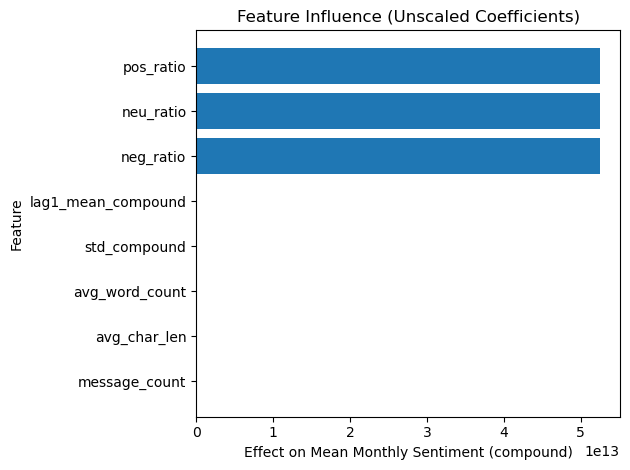

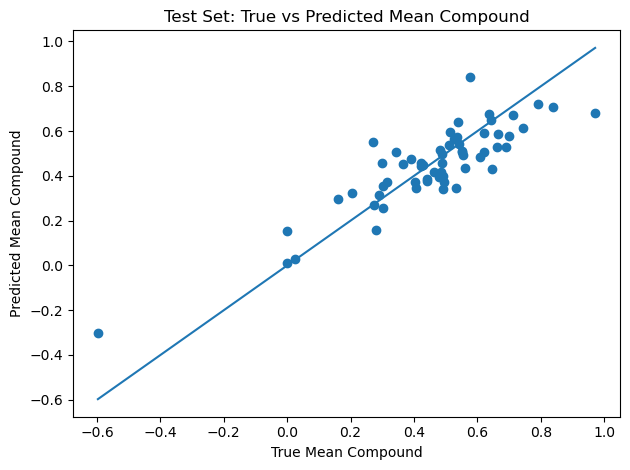

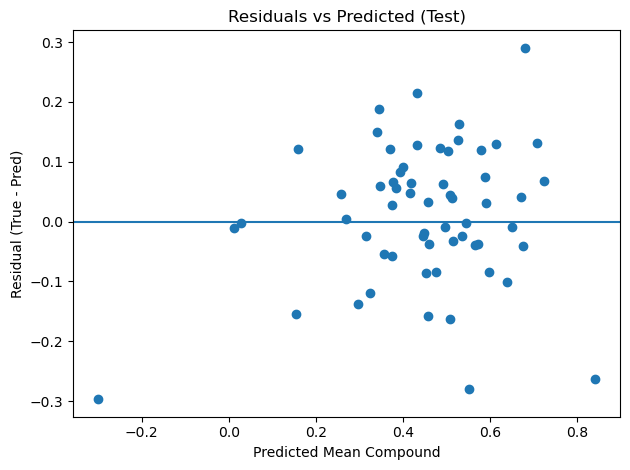

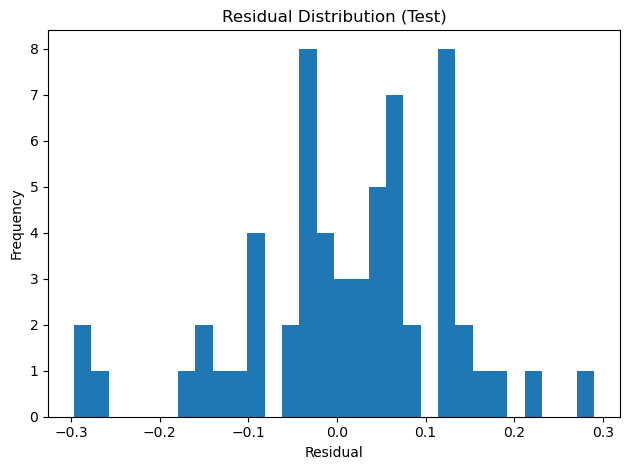

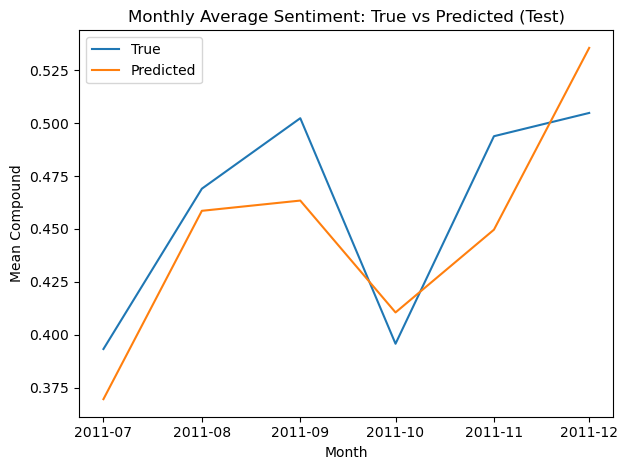


=== Interpretation Summary ===
- Generalization: Test R²=0.754, MAE=0.090, RMSE=0.116.
  The model explains a substantial portion of variance in monthly sentiment.

Top positive drivers (higher -> more positive monthly sentiment):
  • pos_ratio: +52488684390136.2969
  • neu_ratio: +52488684390135.7734
  • neg_ratio: +52488684390135.3984

Top negative drivers (higher -> more negative monthly sentiment):
  • std_compound: -0.0429
  • avg_word_count: -0.0039
  • message_count: 0.0001

Sanity check: A negative coefficient for 'neg_ratio' is expected (more negatives → lower sentiment).
Sanity check: A positive coefficient for 'pos_ratio' is expected (more positives → higher sentiment).
Persistence: A positive coefficient for 'lag1_mean_compound' indicates sentiment momentum across months.


In [69]:
# 7). Ensure we have predictions & coefficient table ---
# Recompute preds if needed
if 'y_pred_train' not in locals():
    y_pred_train = model.predict(X_train)
if 'y_pred_test' not in locals():
    y_pred_test  = model.predict(X_test)

# Metrics
mae_tr  = mean_absolute_error(y_train, y_pred_train)
rmse_tr = mean_squared_error(y_train, y_pred_train, squared=False)
r2_tr   = r2_score(y_train, y_pred_train)
mae_te  = mean_absolute_error(y_test,  y_pred_test)
rmse_te = mean_squared_error(y_test,  y_pred_test,  squared=False)
r2_te   = r2_score(y_test,  y_pred_test)

print(f"[Train] MAE={mae_tr:.4f} | RMSE={rmse_tr:.4f} | R²={r2_tr:.4f}")
print(f"[Test ] MAE={mae_te:.4f} | RMSE={rmse_te:.4f} | R²={r2_te:.4f}")

# Coefficients (unscaled) if not already computed
lin = model.named_steps["linreg"]
scaler = model.named_steps["preprocess"].named_transformers_["num"]
coef_unscaled = lin.coef_ / scaler.scale_
intercept_unscaled = lin.intercept_ - np.sum(lin.coef_ * scaler.mean_ / scaler.scale_)

coef_df = pd.DataFrame({
    "feature": numeric_features,
    "coef_unscaled": coef_unscaled
}).sort_values("coef_unscaled", key=np.abs, ascending=False)

print("\nIntercept (unscaled):", round(intercept_unscaled, 6))
print("\nTop coefficients (by |magnitude|):")
print(coef_df.to_string(index=False))

# 8). Coefficient importance (bar chart) ---
plt.figure()
plt.barh(coef_df["feature"], coef_df["coef_unscaled"])
plt.title("Feature Influence (Unscaled Coefficients)")
plt.xlabel("Effect on Mean Monthly Sentiment (compound)")
plt.ylabel("Feature")
plt.gca().invert_yaxis()  # largest at top
plt.tight_layout()
plt.show()

# 9). True vs Predicted (Test) ---
plt.figure()
plt.scatter(y_test, y_pred_test)
plt.title("Test Set: True vs Predicted Mean Compound")
plt.xlabel("True Mean Compound")
plt.ylabel("Predicted Mean Compound")
lims = [min(y_test.min(), y_pred_test.min()), max(y_test.max(), y_pred_test.max())]
plt.plot(lims, lims)  # 45-degree line
plt.tight_layout()
plt.show()

# 10). Residuals vs Fitted (Test) ---
resid = y_test - y_pred_test
plt.figure()
plt.scatter(y_pred_test, resid)
plt.axhline(0)
plt.title("Residuals vs Predicted (Test)")
plt.xlabel("Predicted Mean Compound")
plt.ylabel("Residual (True - Pred)")
plt.tight_layout()
plt.show()

# 11). Residual distribution (Test) ---
plt.figure()
plt.hist(resid, bins=30)
plt.title("Residual Distribution (Test)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# 12). Time trend: average true vs predicted by month (Test rows only) ---
# Align back to employee-month rows used for X_test/y_test
test_rows = agg.loc[agg["month"].isin(sorted(agg["month"].unique())[-max(2, int(np.ceil(0.25*len(agg["month"].unique())))):])]
# The mask above may not align 1:1 with X_test; safer: use index alignment from the split
# Build a dataframe using the exact order of X_test/y_test from the split:
test_idx_positions = y_test.index if hasattr(y_test, "index") else None
trend_df = agg.loc[test_idx_positions, ["month","from","mean_compound"]].copy()
trend_df["y_pred"] = y_pred_test

trend_month = (
    trend_df.groupby("month", as_index=False)
            .agg(true_mean=("mean_compound","mean"),
                 pred_mean=("y_pred","mean"))
            .sort_values("month")
)

plt.figure()
plt.plot(trend_month["month"], trend_month["true_mean"], label="True")
plt.plot(trend_month["month"], trend_month["pred_mean"], label="Predicted")
plt.title("Monthly Average Sentiment: True vs Predicted (Test)")
plt.xlabel("Month")
plt.ylabel("Mean Compound")
plt.legend()
plt.tight_layout()
plt.show()

# 13). Auto-interpretation (quick bullets for your report) ---
def interpret_model(coefs_df, r2_test, mae_test, rmse_test, top_k=3):
    # Top positive/negative drivers
    top_pos = coefs_df.sort_values("coef_unscaled", ascending=False).head(top_k)
    top_neg = coefs_df.sort_values("coef_unscaled", ascending=True).head(top_k)

    print("\n=== Interpretation Summary ===")
    print(f"- Generalization: Test R²={r2_test:.3f}, MAE={mae_test:.3f}, RMSE={rmse_test:.3f}.")
    if r2_test >= 0.5:
        print("  The model explains a substantial portion of variance in monthly sentiment.")
    elif r2_test >= 0.2:
        print("  The model captures some signal but leaves room for improvement.")
    else:
        print("  Low R² suggests weak linear signal; consider richer features or non-linear models.")
    print("\nTop positive drivers (higher -> more positive monthly sentiment):")
    for _, row in top_pos.iterrows():
        print(f"  • {row['feature']}: +{row['coef_unscaled']:.4f}")
    print("\nTop negative drivers (higher -> more negative monthly sentiment):")
    for _, row in top_neg.iterrows():
        print(f"  • {row['feature']}: {row['coef_unscaled']:.4f}")

    # Common sense sanity checks (if present)
    feats = set(coefs_df["feature"])
    if "neg_ratio" in feats:
        print("\nSanity check: A negative coefficient for 'neg_ratio' is expected (more negatives → lower sentiment).")
    if "pos_ratio" in feats:
        print("Sanity check: A positive coefficient for 'pos_ratio' is expected (more positives → higher sentiment).")
    if "lag1_mean_compound" in feats:
        print("Persistence: A positive coefficient for 'lag1_mean_compound' indicates sentiment momentum across months.")

interpret_model(coef_df, r2_te, mae_te, rmse_te, top_k=3)